In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from numpy import exp, heaviside, pi, log as ln
from scipy.special import gamma, factorial as fac
th = lambda x : heaviside(x, 1/2)

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

# Implicit:

System

$$ \dot y_i(t) = F_j[y]$$

Solver:

$$ y_i(t + \Delta t) = y_i(t) + \Delta t(1 - \Delta t \frac{\partial F_i}{\partial y_j} )^{-1} F_j[y(t)]$$

In [2]:
g = -1.
k = .5
dt = .2

def dF_imp(v, x):
    dv = dt * 1 / (1 + k * dt ) * (g - k * v)
    dx = dt * (dt / (1 + k * dt) * (g - k * v) + v)
    return dv, dx

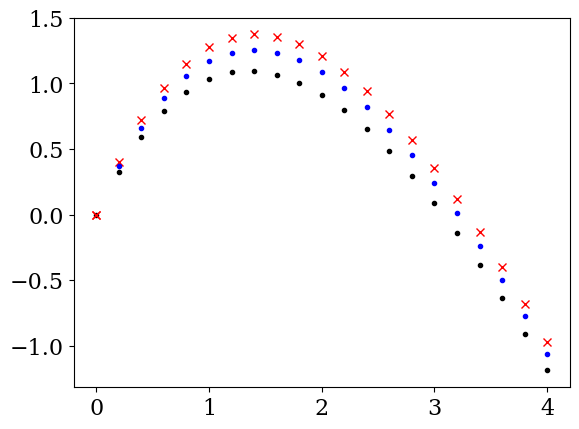

In [3]:
x0 = 0
v0 = 2.
t = 0
M = 20 

v, x = v0, x0
plt.plot(t, x, 'k.')
for i in range(M):
    dv, dx = dF_imp(v, x)
    v = v + dv
    x = x + dx
    t = t + dt
    plt.plot(t, x, 'k.')

t = 0
v, x = v0, x0
plt.plot(t, x, 'rx')
for i in range(M):
    vn = v + (g - k*v) * dt
    xn = x + v * dt
    v, x = vn, xn
    t = t + dt
    plt.plot(t, x, 'rx')


t = 0
plt.plot(t, x0, 'rx')
for i in range(M):
    for j in range(5):
        v = v0 + (g - k*v0) * dt/5
        x = x0 + v0 * dt/5
        x0, v0 = x, v
    t = t + dt
    plt.plot(t, x, 'b.')



plt.show()

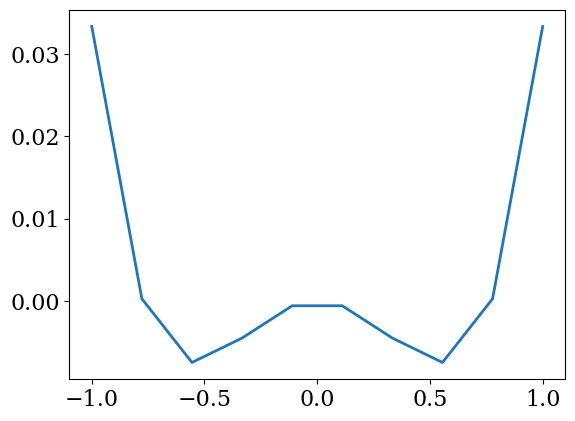

In [141]:
r0 = -.1
u0 = 2.

n = 10
phi_max = 1.
phi = np.linspace(-phi_max, phi_max, n, dtype=np.longdouble)
dp = phi[1] - phi[0]
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)

plt.plot(phi, U0)

In [142]:
# Fourth order finite difference stencils

def D(U, dx):
    DU = np.zeros_like(U)
    DU[+2:-2] = +(-1/12*U[4:] + 2/3*U[3:-1] - 2/3*U[1:-3] + 1/12*U[:-4]) / dx
    DU[+0:+2] = +(-1/4*U[+4:+6] + 4/3*U[+3:+5] - 3*U[+2:+4] + 4*U[+1:+3] - 25/12*U[+0:+2]) / dx
    DU[-2:  ] = -(-1/4*U[-6:-4] + 4/3*U[-5:-3] - 3*U[-4:-2] + 4*U[-3:-1] - 25/12*U[-2:  ]) / dx
    return DU

def DD(U, dx):
    DDU = np.zeros_like(U)
    DDU[+2:-2] = (-1/12*(U[4:]+U[:-4]) + 4/3*(U[3:-1]+U[1:-3]) -5/2* U[2:-2]) / dx**2 
    DDU[+0:+2] = (-5/6*U[+5:+7] + 61/12*U[+4:+6] - 13*U[+3:+5] + 107/6*U[+2:+4] - 77/6*U[+1:+3] + 15/4*U[+0:+2]) / dx**2
    DDU[-2:  ] = (-5/6*U[-7:-5] + 61/12*U[-6:-4] - 13*U[-5:-3] + 107/6*U[-4:-2] - 77/6*U[-3:-1] + 15/4*U[-2:  ]) / dx**2
    return DDU

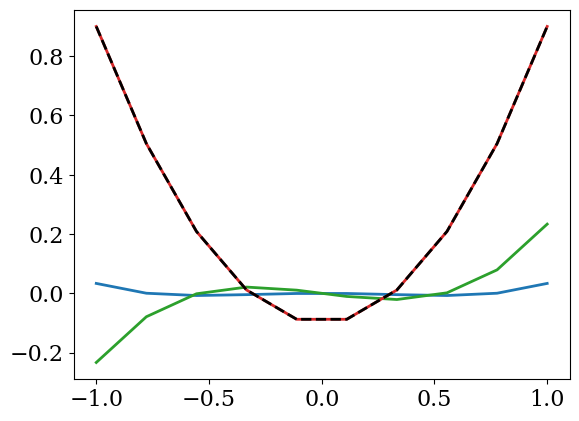

In [143]:
plt.plot(phi, U0, dp)
plt.plot(phi, D(U0,dp))
plt.plot(phi, DD(U0,dp))
plt.plot(phi, D(D(U0,dp),dp), 'k--')

In [144]:
C = lambda d : 2/d * 2/(4*pi)**(d/2)/gamma(2/d)

def F(U, phi, dp, d=3):
    return ( d * U - (d-2)/2 * phi * D(U, dp) + C(d) / (1 + DD(U, dp)))

def G(Y, *args):
    X, phi, dp, dt, d = args
    return Y - X + dt * F(Y, phi, dp)

In [146]:
r0 = 1
u0 = 1

n = 100
phi_max = 1.
phi = np.linspace(-phi_max, phi_max, n, dtype=np.float64)
dp = phi[1] - phi[0]
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)

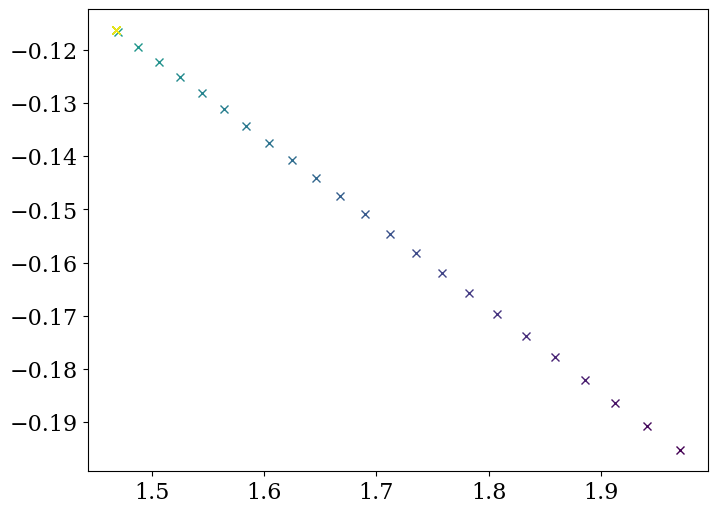

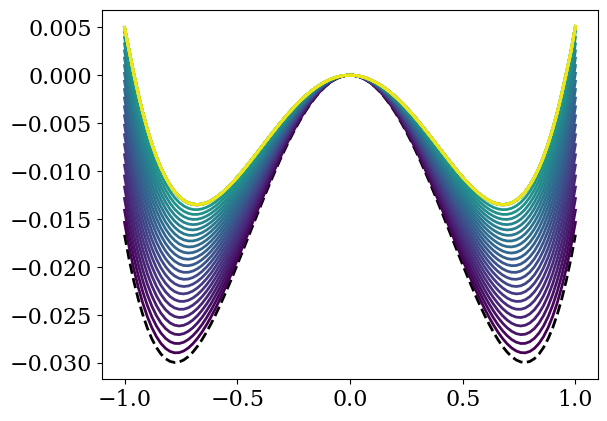

In [162]:
from scipy.optimize import root

dt = 0.001

N = 40
M = 10
d = 3


r0 = -0.2
u0 = 2.
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)
Ui = U0
Ue = U0


fig1, ax1 = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(phi, Ui - Ui[n//2], "--k")

for i in range(N):
    for j in range(M):
        sol = root(G, Ui, args=(Ui, phi, dp, dt, d))
        Ui = sol.x
        # Ue = Ue + F(Ue, phi, dp, d=d) * dt
    ax.plot(phi, Ui - Ui[n//2], color=cm.viridis(i/N))
    # ax.plot(phi, Ue - Ue[n//2], "--k")

    r = DD(Ui, dp)[n//2]
    u = DD(DD(Ui, dp), dp)[n//2]
    color = cm.viridis(i/N)
    ax1.plot(u, r, 'x', color=cm.viridis(i/N))

    plt.plot()
# ax.set_ylim(-.5, .5)

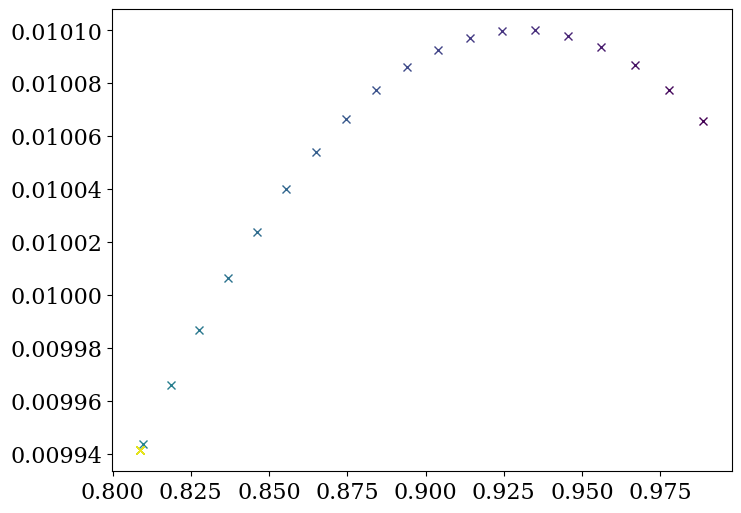

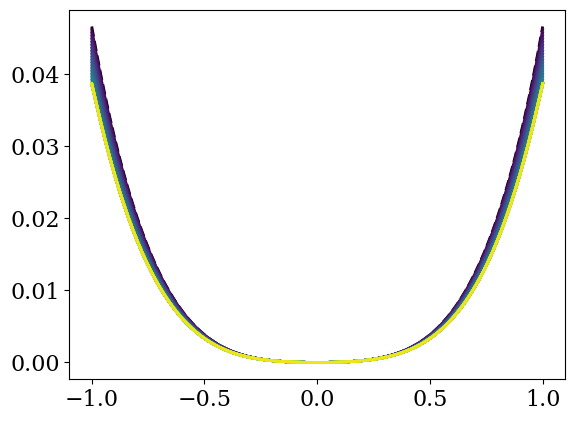

In [166]:
from scipy.optimize import root

dt = 0.001

N = 40
M = 10
d = 3


r0 = 0.01
u0 = 1.
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)
Ui = U0
Ue = U0


fig1, ax1 = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots()
ax.plot(phi, Ui - Ui[n//2], "--k")

for i in range(N):
    for j in range(M):
        sol = root(G, Ui, args=(Ui, phi, dp, dt, d))
        Ui = sol.x
        # Ue = Ue + F(Ue, phi, dp, d=d) * dt
    ax.plot(phi, Ui - Ui[n//2], color=cm.viridis(i/N))
    # ax.plot(phi, Ue - Ue[n//2], "--k")

    r = DD(Ui, dp)[n//2]
    u = DD(DD(Ui, dp), dp)[n//2]
    color = cm.viridis(i/N)
    ax1.plot(u, r, 'x', color=cm.viridis(i/N))

    plt.plot()
# ax.set_ylim(-.5, .5)

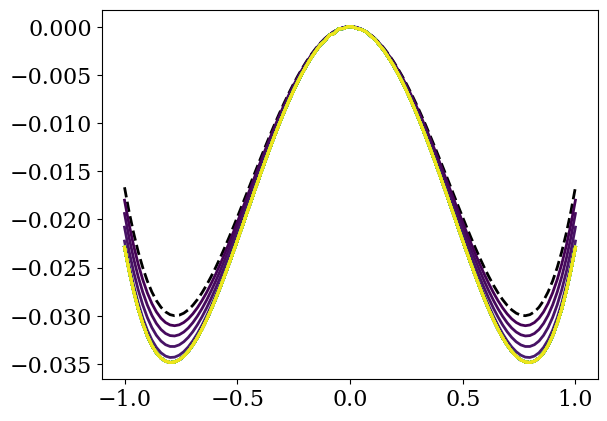

In [175]:
from scipy.optimize import root

dt = -0.001

N = 40
M = 10
d = 3


r0 = -0.2
u0 = 2.
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)
Ui = U0
Ue = U0

fig, ax = plt.subplots()
ax.plot(phi, Ui - Ui[n//2], "--k")

for i in range(N):
    for j in range(M):
        sol = root(G, Ui, args=(Ui, phi, dp, dt, d))
        Ui = sol.x
        # Ue = Ue + F(Ue, phi, dp, d=d) * dt
    ax.plot(phi, Ui - Ui[n//2], color=cm.viridis(i/N))
    # ax.plot(phi, Ue - Ue[n//2], "--k")

    plt.plot()
# ax.set_ylim(-.5, .5)``

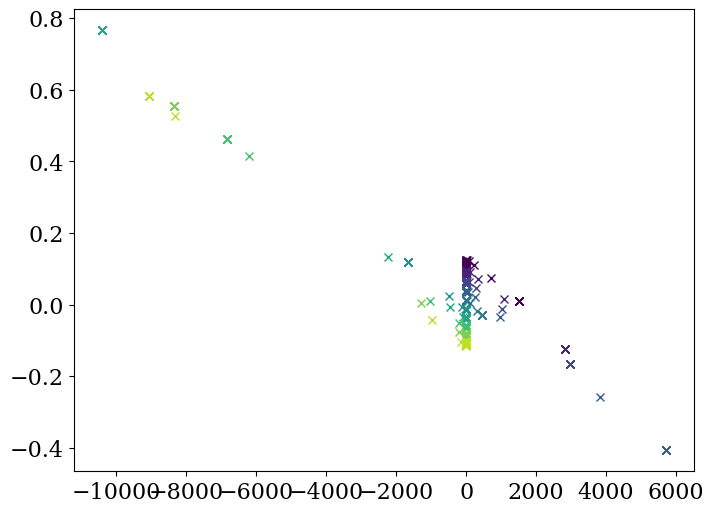

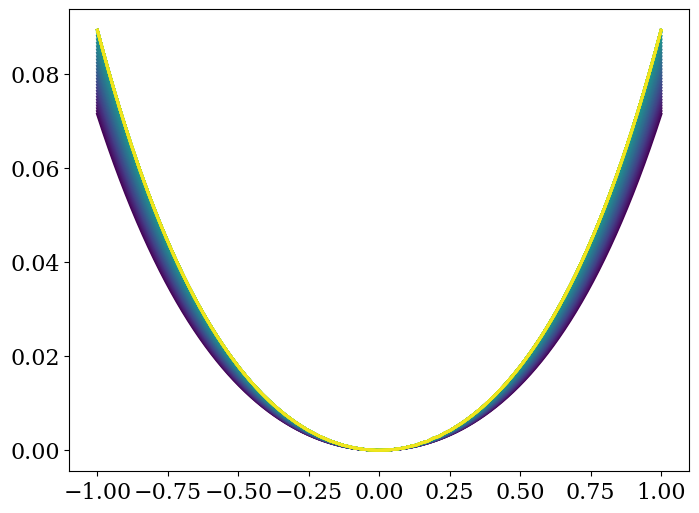

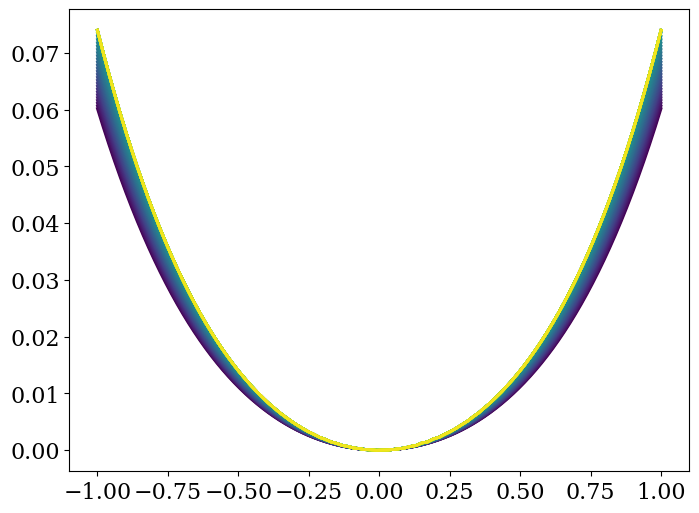

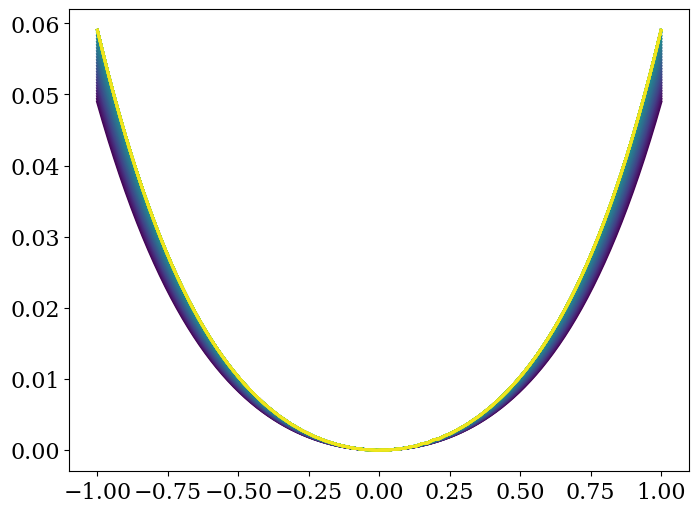

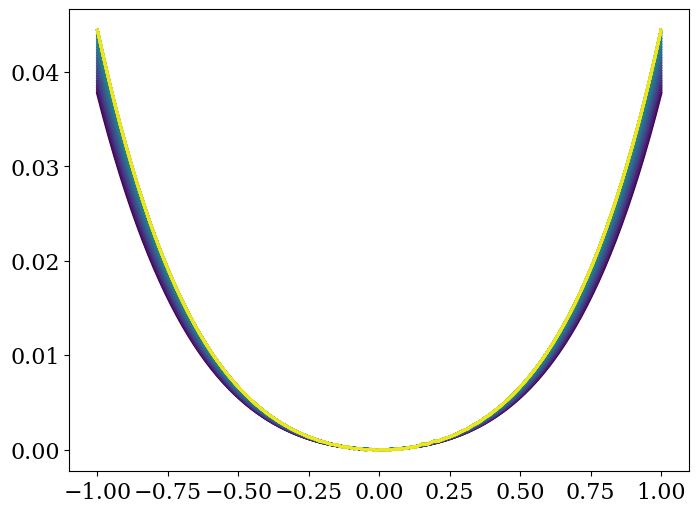

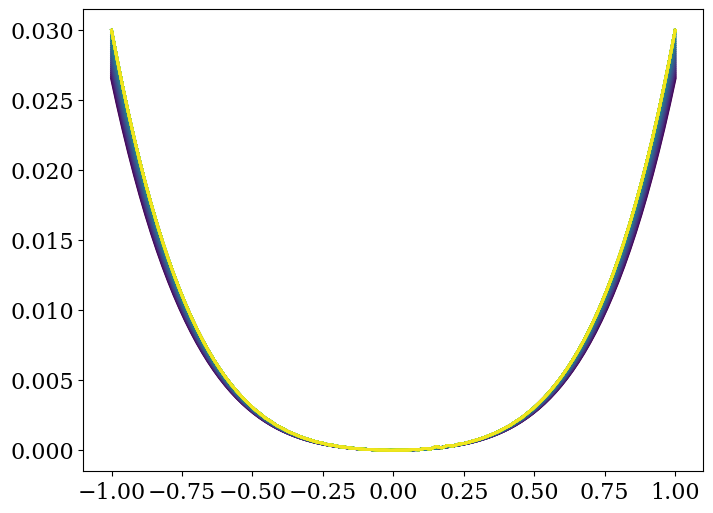

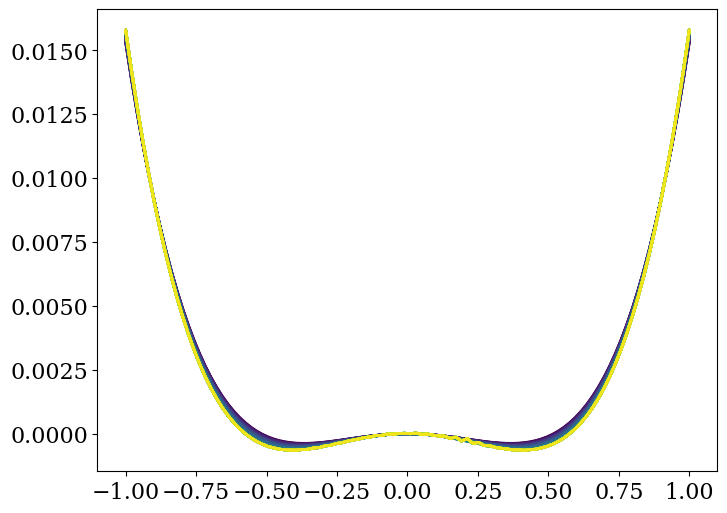

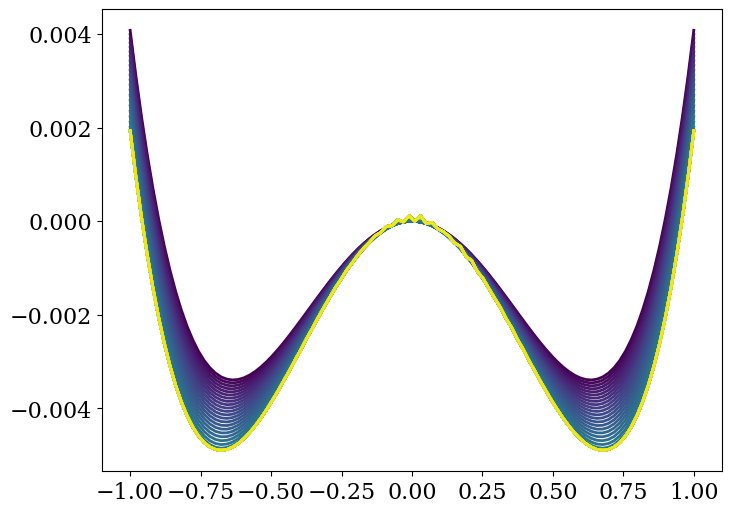

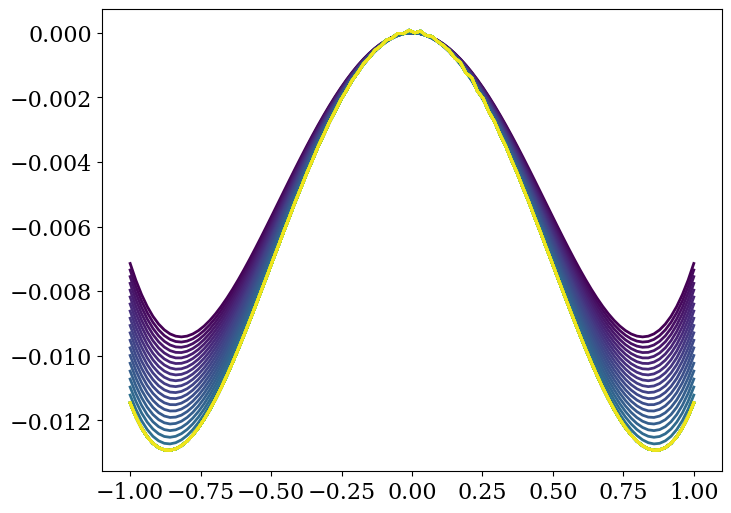

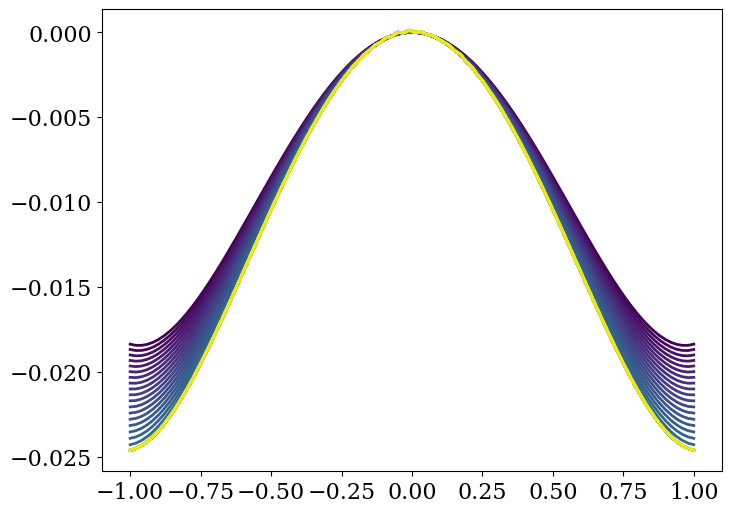

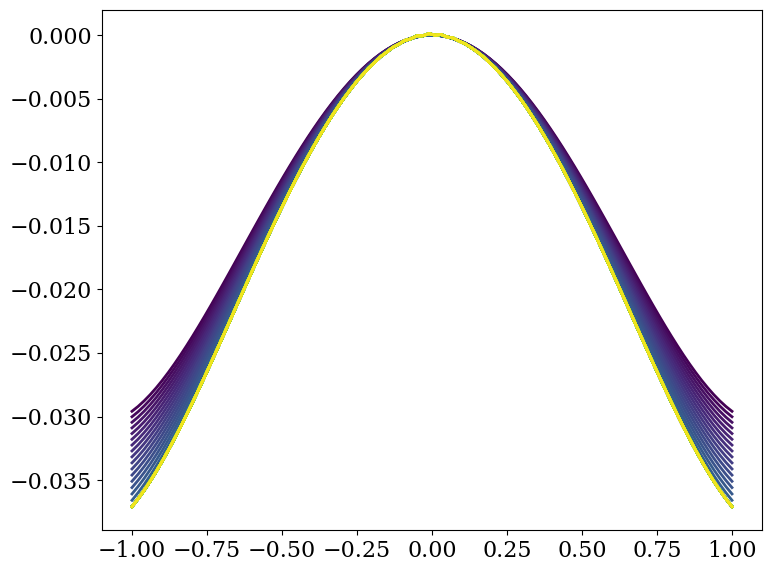

In [180]:
dt = -0.0001

N = 50
M = 50
d = 3

fig1, ax1 = plt.subplots(figsize=(8, 6))

for k, r0 in enumerate(np.linspace(.1, -.1, 10)):
    u0 = .5
    U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4)
    Ue = U0
    Ui = U0
    fig, ax = plt.subplots(figsize=(8, 6))

    for i in range(N):
        for j in range(M):
            sol = root(G, Ui, args=(Ui, phi, dp, dt, d))
            Ui = sol.x

        r = DD(Ui, dp)[n//2]
        u = DD(DD(Ui, dp), dp)[n//2]
        color = cm.viridis(i/N)
        ax1.plot(u, r, 'x', color=cm.viridis(k/10))
        ax.plot(phi, Ui - Ui[n//2], color=color)
    
    plt.plot()

# ax1.set_xlim(-0.1, 2.)
# ax1.set_ylim(-0.5, 0.5)
plt.tight_layout()

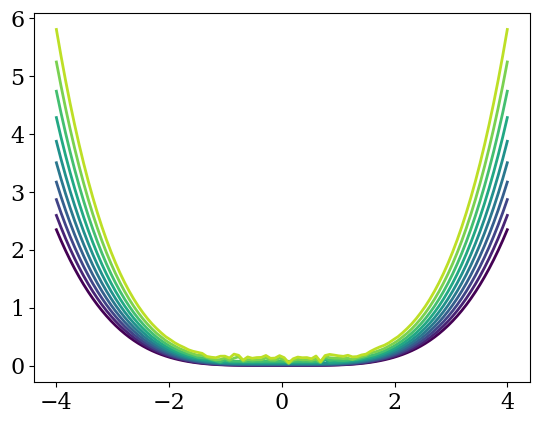

In [ ]:
dt = 0.00001
N = 10
M = 10_000
d = 3


r0 = -.001
u0 = 0.2
U0 = r0 * phi**2 / 2 + u0 * phi**4 / fac(4) #+ (2) / fac(6) * phi**6
U = U0

fig, ax = plt.subplots()

for i in range(N):
    for j in range(M):
        U = U - F(U, phi, dp, d=d) * dt
    ax.plot(phi, U, color=cm.viridis(i/N))

# ax.set_ylim(-3, 5)